In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
import tensorflow as tf
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense


In [2]:
data = pd.read_csv("D:/Assignments/Neural networks/Neural networks/Alphabets_data.csv")
data

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
data.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [5]:
duplicates = data.duplicated()
duplicates.value_counts()

False    18668
True      1332
Name: count, dtype: int64

In [6]:
data1 = data.drop_duplicates(keep=False) # removing the duplicates by using duplicate() function

In [7]:
duplicates = data1.duplicated()
duplicates.value_counts() # Removed all duplicates

False    17823
Name: count, dtype: int64

In [8]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17823 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  17823 non-null  object
 1   xbox    17823 non-null  int64 
 2   ybox    17823 non-null  int64 
 3   width   17823 non-null  int64 
 4   height  17823 non-null  int64 
 5   onpix   17823 non-null  int64 
 6   xbar    17823 non-null  int64 
 7   ybar    17823 non-null  int64 
 8   x2bar   17823 non-null  int64 
 9   y2bar   17823 non-null  int64 
 10  xybar   17823 non-null  int64 
 11  x2ybar  17823 non-null  int64 
 12  xy2bar  17823 non-null  int64 
 13  xedge   17823 non-null  int64 
 14  xedgey  17823 non-null  int64 
 15  yedge   17823 non-null  int64 
 16  yedgex  17823 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.4+ MB


In [9]:
data2= data1.copy()

In [10]:
data2 = pd.DataFrame(data2)


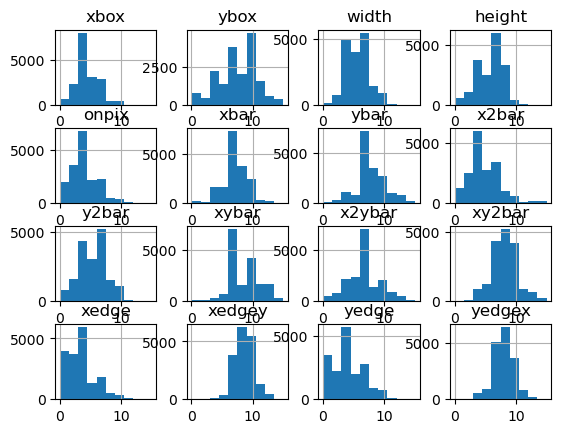

In [11]:
data2.hist()
plt.rcParams.update({'figure.figsize':(25,12), 'figure.dpi':100})

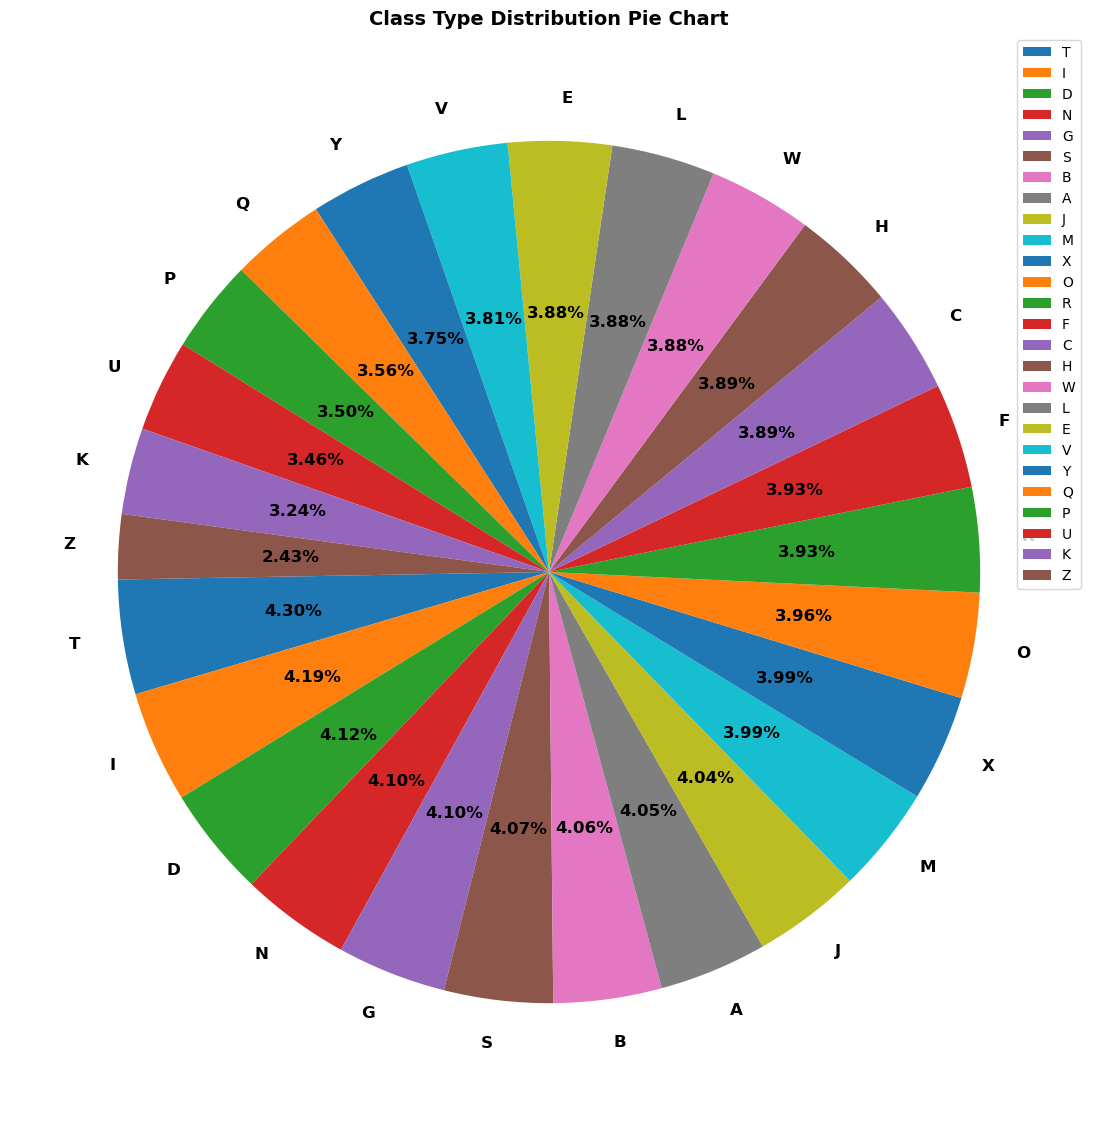

In [12]:
plt.figure(figsize=(14, 14))
plt.pie(data2['letter'].value_counts(), labels=data2.letter.unique(), 
        autopct='%.2f%%', startangle=181, textprops={'size': 'large', 'fontweight': 'bold', 'color': 'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize=14, fontweight='bold')
plt.show()

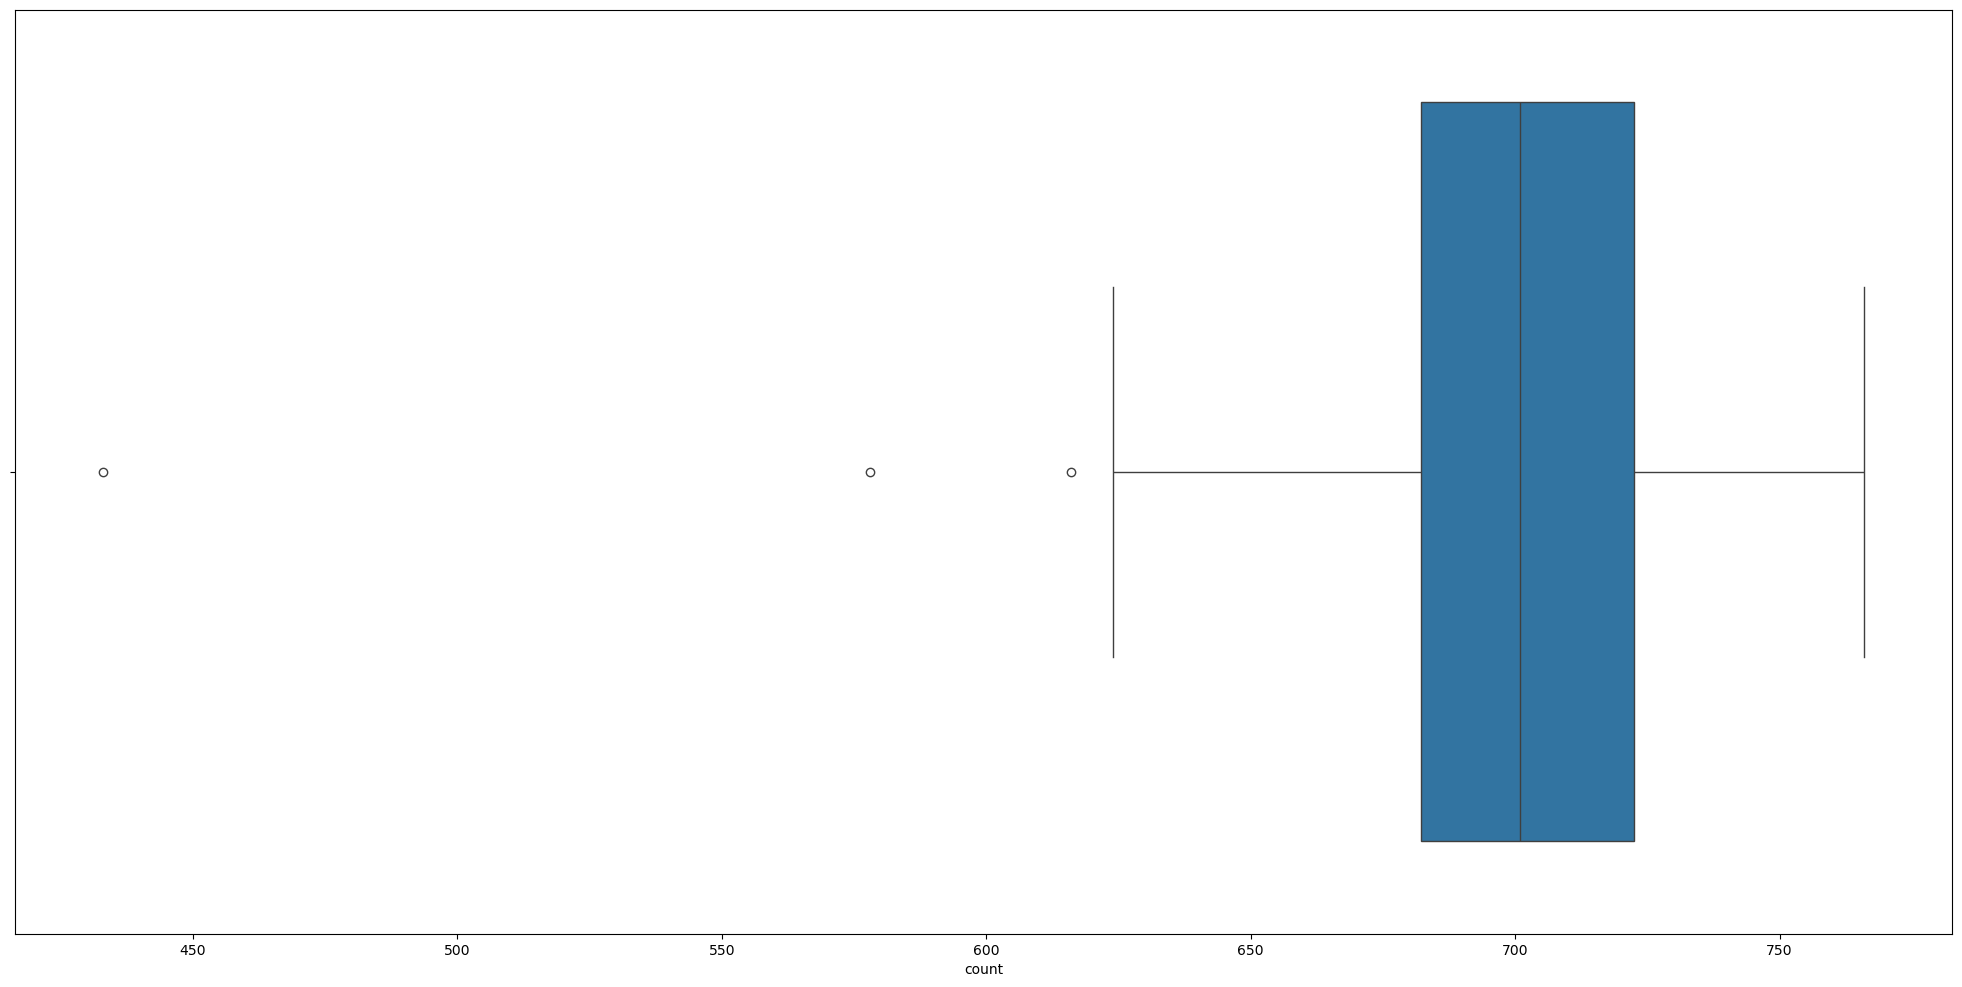

In [13]:
df = data2.letter.value_counts()
sns.boxplot(x=df)
plt.show()

In [14]:
print(data2.dtypes)


letter    object
xbox       int64
ybox       int64
width      int64
height     int64
onpix      int64
xbar       int64
ybar       int64
x2bar      int64
y2bar      int64
xybar      int64
x2ybar     int64
xy2bar     int64
xedge      int64
xedgey     int64
yedge      int64
yedgex     int64
dtype: object


In [15]:
numeric_data = data2.select_dtypes(include=[float, int])


In [16]:
data2 = data2.replace('T', np.nan)


In [17]:
correlation = numeric_data.corr()
correlation.style.background_gradient(cmap='BrBG')


,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
xbox,1.000000,0.748362,0.829605,0.642565,0.564778,-0.045073,0.028631,0.008651,0.029206,0.129227,0.031936,-0.044722,0.463695,0.092861,0.234572,-0.092619
ybox,0.748362,1.000000,0.646118,0.790499,0.507386,0.042840,-0.066102,-0.011138,0.066627,0.143203,-0.062478,-0.003794,0.252424,-0.011400,0.205421,-0.023210
width,0.829605,0.646118,1.000000,0.633211,0.734424,0.052838,-0.003471,-0.113744,0.028595,0.071276,-0.001380,-0.044686,0.543630,0.032223,0.209588,-0.106519
height,0.642565,0.790499,0.633211,1.000000,0.619714,0.043178,-0.034951,0.105662,0.012821,-0.017613,-0.009866,0.032764,0.239550,0.022680,0.286599,0.001244
onpix,0.564778,0.507386,0.734424,0.619714,1.000000,0.135631,-0.058017,-0.001888,-0.112586,-0.137996,-0.083302,-0.037891,0.627283,0.008410,0.481452,-0.047676
xbar,-0.045073,0.042840,0.052838,0.043178,0.135631,1.000000,-0.421802,-0.053796,-0.130721,0.035193,-0.406691,-0.051058,0.135094,-0.263116,0.126349,0.265455
ybar,0.028631,-0.066102,-0.003471,-0.034951,-0.058017,-0.421802,1.000000,-0.104648,-0.049344,0.138924,0.594260,-0.292967,-0.057382,0.566385,-0.108417,-0.213899
x2bar,0.008651,-0.011138,-0.113744,0.105662,-0.001888,-0.053796,-0.104648,1.000000,-0.146324,-0.303226,0.039747,0.091489,0.094805,-0.075381,0.052937,0.187719
y2bar,0.029206,0.066627,0.028595,0.012821,-0.112586,-0.130721,-0.049344,-0.146324,1.000000,0.120306,-0.043088,0.117797,-0.384926,-0.061405,0.214748,-0.061871
xybar,0.129227,0.143203,0.071276,-0.017613,-0.137996,0.035193,0.138924,-0.303226,0.120306,1.000000,0.031690,-0.128413,-0.212275,0.020065,-0.147920,-0.104298


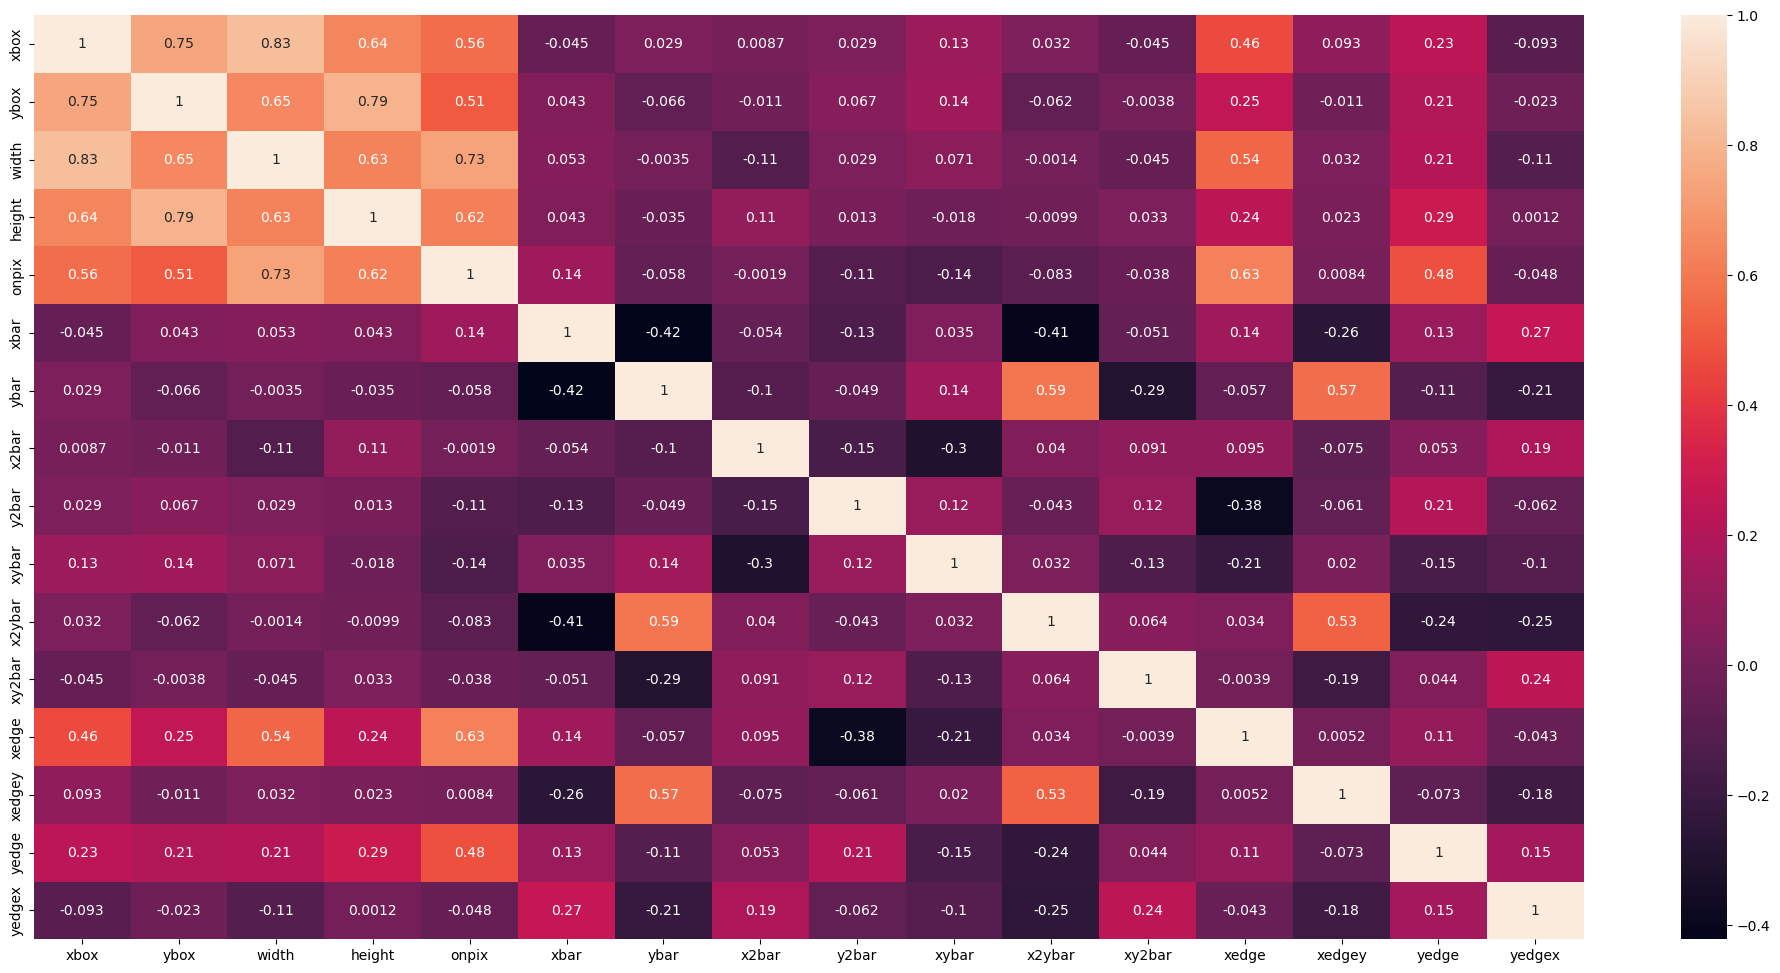

In [18]:
data2 = np.random.randint(low=1, 
                         high=100, 
                         size=(10, 10)) 
# plotting the heatmap 
hm = sns.heatmap(data=correlation, 
                annot=True) 
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    
# displaying the plotted heatmap 
plt.show()

In [19]:
# Import label encoder 
from sklearn import preprocessing

# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'letters'. 
data1['letter']= label_encoder.fit_transform(data1['letter']) 
  
data1['letter'].unique() 

array([19,  8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2,  7, 22,
       11,  4, 21, 24, 16, 15, 20, 10, 25])

In [20]:
x = data1.drop('letter',axis = 1)
y = data1['letter']

In [21]:
x

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,5,8,7,7,7,7,9,4,8,7,7,8,3,10,8,6
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4


In [22]:
y

0        19
1         8
2         3
3        13
4         6
         ..
19994    19
19995     3
19996     2
19997    19
19999     0
Name: letter, Length: 17823, dtype: int32

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

+ # Artificial Neural Network Model - Backpropagation

### Lets create model

In [26]:
model = Sequential()
model.add(Dense(128, input_dim=16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(26, activation='softmax'))

### Compile model

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Fit the model

In [30]:
history=model.fit(x_train,y_train, validation_split=0.33, epochs=100, batch_size= 128 )

Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0691 - loss: 3.5037 - val_accuracy: 0.1972 - val_loss: 2.6254
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2929 - loss: 2.3829 - val_accuracy: 0.4707 - val_loss: 1.8509
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5353 - loss: 1.6903 - val_accuracy: 0.5644 - val_loss: 1.4954
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6136 - loss: 1.3910 - val_accuracy: 0.6209 - val_loss: 1.3165
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - loss: 1.2405 - val_accuracy: 0.6432 - val_loss: 1.2249
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6809 - loss: 1.1420 - val_accuracy: 0.6804 - val_loss: 1.1317
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6965 - loss: 1.0799 - val_accuracy: 0.6745 - val_loss: 1.1068
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7042 - loss: 1.0489 - val_accuracy: 0.7051 - v

# Lets evaluate the model

In [32]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.9090 - loss: 0.2900
compile_metrics: 90.62%


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_pred = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_encoded)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Generate classification report and Print the report

In [35]:
report = classification_report(y_test_pred, y_pred_letters, target_names=expected_labels)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           T       0.96      0.94      0.95       142
           I       0.79      0.90      0.84       142
           D       0.97      0.90      0.93       127
           N       0.89      0.88      0.89       155
           G       0.73      0.84      0.79       141
           S       0.89      0.85      0.87       171
           B       0.87      0.91      0.89       139
           A       0.89      0.72      0.80       138
           J       0.78      0.82      0.80        83
           M       0.90      0.91      0.90       131
           X       0.92      0.83      0.87       140
           O       0.96      0.93      0.95       114
           R       0.96      0.91      0.93       146
           F       0.89      0.92      0.91       133
           C       0.82      0.91      0.86       133
           H       0.93      0.88      0.90       144
           W       0.91      0.92      0.92       146
    

# Lets build the neural network using two hidden layers

In [37]:
model = Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train,y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.2114 - loss: 2.7376 - val_accuracy: 0.5799 - val_loss: 1.3751
Epoch 2/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6273 - loss: 1.2631 - val_accuracy: 0.6855 - val_loss: 1.0566
Epoch 3/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7106 - loss: 0.9975 - val_accuracy: 0.7198 - val_loss: 0.9365
Epoch 4/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7418 - loss: 0.8644 - val_accuracy: 0.7349 - val_loss: 0.8558
Epoch 5/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7730 - loss: 0.7472 - val_accuracy: 0.7661 - val_loss: 0.7789
Epoch 6/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7945 - loss: 0.6815 - val_accuracy: 0.7752 - val_loss: 0.7029
Epoch 7/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8018 - loss: 0.6471 - val_accuracy: 0.8138 - val_loss: 0.6128
Epoch 8/50
357/357 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8229 - loss: 0.5746 - val_accuracy: 0.

In [38]:
# evaluate the model
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

557/557 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9441 - loss: 0.1806
compile_metrics: 94.05%


In [39]:
# Define expected unique labels (based on your previous output)
expected_labels = ['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R', 'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z']

# Evaluate the model
y_pred_prob = model.predict(x_test)
y_pred_encoded = np.argmax(y_pred_prob, axis=1)

# Convert predicted labels back to original letters using inverse_transform
y_test_pred = label_encoder.inverse_transform(y_test)
y_pred_letters = label_encoder.inverse_transform(y_pred_encoded)

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
# Generate classification report
report = classification_report(y_test_pred, y_pred_letters, target_names=expected_labels)

# Print classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           T       0.93      0.99      0.96       142
           I       0.94      0.88      0.91       142
           D       0.97      0.89      0.93       127
           N       0.95      0.90      0.92       155
           G       0.93      0.82      0.87       141
           S       0.96      0.92      0.94       171
           B       0.88      0.88      0.88       139
           A       0.96      0.78      0.86       138
           J       0.92      0.92      0.92        83
           M       0.96      0.92      0.94       131
           X       0.94      0.93      0.93       140
           O       0.92      0.94      0.93       114
           R       0.93      0.99      0.96       146
           F       0.83      0.96      0.89       133
           C       0.80      0.96      0.87       133
           H       0.93      0.96      0.94       144
           W       0.96      0.90      0.93       146
    

# Hyper Parameter Tuning

In [42]:
import numpy as np
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Example Data (Ensure you load your actual data)
# Assume x_train and y_train have been preprocessed correctly
# x_train, x_test, y_train, y_test = your_data_loading_and_preprocessing_code()

# Define model creation function
def create_model(optimizer='adam', activation='relu', neurons=64, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_shape=(x_train.shape[1],)))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation=activation))
        
    model.add(Dense(26, activation='softmax'))  # Assuming 26 classes for alphabets

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create KerasClassifier based on the create_model function
model = KerasClassifier(
    model=create_model, 
    verbose=1,  # Set verbose=1 to get logs for the model training
    optimizer='adam',  # Set default values for the parameters
    activation='relu', 
    neurons=64,
    hidden_layers=1,
    epochs=10,  # Reduce epochs for faster debugging
    batch_size=32
)

# Define hyperparameters grid for GridSearchCV (smaller grid for quicker testing)
param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'activation': ['relu', 'tanh'],
    'neurons': [32, 64],
    'hidden_layers': [1],
    'epochs': [10],  # Reduced to 10 for faster execution
    'batch_size': [32, 64]
}

# Perform GridSearchCV for hyperparameter tuning with verbose=3 to get detailed output
print("Starting GridSearchCV...")
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=3)
grid_result = grid_search.fit(x_train, y_train)




Starting GridSearchCV...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Epoch 1/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 978us/step - accuracy: 0.1112 - loss: 3.7403
Epoch 2/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.4172 - loss: 2.0019
Epoch 3/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.5736 - loss: 1.5272
Epoch 4/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.6319 - loss: 1.3493
Epoch 5/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 948us/step - accuracy: 0.6675 - loss: 1.2396
Epoch 6/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.6813 - loss: 1.1697
Epoch 7/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.7076 - loss: 1.0749
Epoch 8/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.7110 - loss: 1.0438
Epoch 9/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.7289 - loss: 0.9950
Epoch 10/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.7198 - loss: 0.9877
149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [43]:
# Output the best parameters and best score
print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_}")

# Test the best model on your test set
y_pred = grid_search.best_estimator_.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")

Best Parameters: {'activation': 'tanh', 'batch_size': 32, 'epochs': 10, 'hidden_layers': 1, 'neurons': 64, 'optimizer': 'rmsprop'}
Best Accuracy: 0.7747236933233497
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Test Accuracy: 0.8140252454417952


# Analysis of Results (Summary)
+ ## Best Parameters:

+ Activation: tanh
+ Batch Size: 32
+ Epochs: 10
+ Hidden Layers: 1
+ Neurons: 64
+ Optimizer: rmsprop
+ Training Accuracy: 77.47%

+ ## Test Accuracy: 81.40%

+ # Key Insights:
### Generalization: The model generalized well with higher test accuracy than training accuracy, indicating no overfitting.
### Model Simplicity: The problem was sufficiently handled with a simple architecture (1 hidden layer, 64 neurons), implying a low complexity classification task.
### Tuning Impact: Hyperparameter tuning improved accuracy, with key changes in optimizer and activation function driving better results.

In [79]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.92      0.91       142
           1       0.66      0.86      0.75       142
           2       0.93      0.65      0.77       127
           3       0.70      0.91      0.79       155
           4       0.84      0.64      0.73       141
           5       0.92      0.77      0.83       171
           6       0.68      0.81      0.74       139
           7       0.72      0.72      0.72       138
           8       0.67      0.76      0.71        83
           9       0.87      0.85      0.86       131
          10       0.87      0.74      0.80       140
          11       0.88      0.87      0.87       114
          12       0.93      0.90      0.91       146
          13       0.86      0.91      0.89       133
          14       0.82      0.75      0.78       133
          15       0.91      0.83      0.87       144
          16       0.81      0.79      0.80       146
          17       0.69    

# Averages:
+ Macro Average:
+ Precision: 0.82
+ Recall: 0.81
+ F1-Score: 0.81
+ Weighted Average:
+ Precision: 0.82
+ Recall: 0.81
+ F1-Score: 0.81
+ 
# Analysis:
+ Overall Performance:
+ The model achieved an overall accuracy of 81%, which indicates a strong performance in classifying the alphabets.
  
# Class-Specific Observations:
+ Highest Precision: Class 2 (0.93) shows excellent precision, indicating it has few false positives.
+ Lowest Precision: Class 1 (0.66) indicates many false positives, suggesting it may be confused with other classes.
+ Best Recall: Class 0 (0.92) achieved the highest recall, successfully identifying most instances of this class.
+ Lowest Recall: Class 2 (0.65) suggests that it missed some instances, indicating a potential need for better representation or features for this class.
  
# Balance Between Precision and Recall:

+ The F1-scores show a balanced performance across classes, with some classes performing better than others. Class 2, despite having high precision, has a relatively low recall, affecting its F1-score.

# Conclusion
+ The model achieved 77.47% accuracy on the training data and 81.40% on the test data, with a relatively simple architecture and a minimal number of epochs (10).
+ The grid search identified tanh, rmsprop, and a batch size of 32 as the best hyperparameters for this task.
+ Overall, the classification model is performing well, but there is still room to experiment with additional techniques and further refinement to push accuracy even higher.